Необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. На данных обучить модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучить модель на необработанных данных и посчитайте метрику качества. Провести очистку данных. Обучить модель на данных после обработки, посчитать метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

### Этапы работы:

1) Получите и загрузите данные.

2) Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

3) Снова загрузите полные данные.

4) Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

5) Проверьте данные на наличие пропущенных значений.

**a)** Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
**b)** Заполните пропуски: средним значением, константой, классом, указывающим на то, что значение было пропущено, случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

6) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

7) Проверьте данные на наличие выбросов.
**a)** Удалите выбросы, если считаете это целесообразным. Обоснуйте.

8) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

9) *Попробуйте математически преобразовать признак Age.

10) Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

11) Сформулируйте выводы по проделанной работе.

**a)** Кратко опишите какие преобразования были сделаны и почему.
**b)** Сравните метрики моделей из п. 2 и п. 10.
**c)** Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

### Удалим все пропущенные значения и категориальные переменные.

In [4]:
data_with_dropped = data.copy()
data_with_dropped.dropna(axis=0, inplace=True)
data_with_dropped = data_with_dropped.drop(columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

In [5]:
data_with_dropped.head()

,Survived,Age,SibSp,Parch,Fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,0,54.0,0,0,51.8625
10,1,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500


In [6]:
data_with_dropped.shape

(183, 5)

### Обучим модель и посчитаем метрику качества.

In [7]:
X = data_with_dropped[data_with_dropped.columns[1:]]
y = data_with_dropped['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [9]:
model = LogisticRegression(solver = 'newton-cg')
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [10]:
pred_with_dropped = model.predict_proba(X_test)

In [11]:
model.score(X_train, y_train)

0.7397260273972602

In [12]:
model.score(X_test, y_test)

0.6486486486486487

In [13]:
roc_auc_score(y_test, pred_with_dropped[:, 1])

0.8198757763975155

### Работа с изначальным dataframe. Удалим признаки, которые логически не нужны для построения модели.

In [14]:
data.corr()[['Survived']].sort_values(by='Survived', ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


Мы можем удалить следующие признаки:

- PassengerId, Name(перед удалением получим статус пассажира) и Ticket так как эти признаки служат только для идентификации пассажары и не несут пользы для модели

- Cabin, так как номер каюты зависил от класса (Pclass). Я опускаю тот момент, что вероятность погибнуть в каютах расположенных в районе удара "Титаника" о айсберг была больше

In [15]:
data['status'] = data['Name'].apply(lambda x: re.search(r'\s\w*[.]', x)[0])

In [16]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

### Проверка данных на наличие пропущенных значений.

-   Посчитаем, какой процент данных будет потерян, если просто удалить пропуски.

-   Заполню пропуски

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   status    891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [18]:
lost_data = data.dropna(axis=0).shape[0] / data.shape[0] * 100
print(f'При удалении всех записей с пропусками мы потеряем {100 - lost_data:.1f}% записей')

При удалении всех записей с пропусками мы потеряем 20.1% записей


Пропущенные значения в Embarked заменим на моду, а значения в Age - на медиану с учётом группировки по полу и статусу, так как средний возраст мужчин женщин на Титанике отличался

In [19]:
data['Age'] = data.groupby(['Sex', 'status'], sort=False)['Age'].apply(lambda x: x.fillna(round(x.mean(),0)))
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [20]:
data.isna().sum().sum()

0

### Переведём категориальные признаки в количественные

In [21]:
onehotencoder = OneHotEncoder()

In [22]:
sex = onehotencoder.fit_transform(data[['Sex']]).toarray()
sex = pd.DataFrame(sex, columns=onehotencoder.categories_[0])

embarked = onehotencoder.fit_transform(data[['Embarked']]).toarray()
embarked = pd.DataFrame(embarked, columns=onehotencoder.categories_[0])

status = onehotencoder.fit_transform(data[['status']]).toarray()
status = pd.DataFrame(status, columns=onehotencoder.categories_[0])

In [23]:
data = pd.concat([data, sex, embarked, status], axis=1)
data = data.drop(columns = ['Sex', 'Embarked', 'status'])

### Проверка данных на наличие выбросов

In [24]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass  

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass  

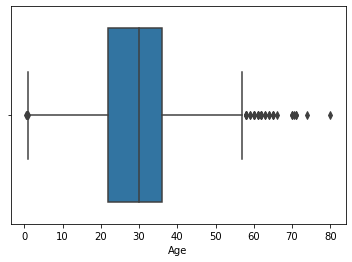

In [25]:
get_boxplot(data, columns = ['Age'])

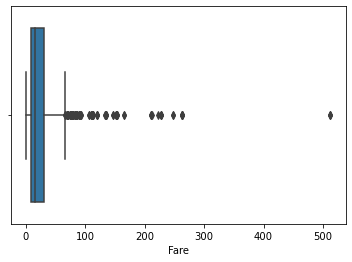

In [26]:
get_boxplot(data, columns = ['Fare'])

In [27]:
data = data[data['Age'] < 75]
data = data[data['Fare'] < 500]

Я исключил данные, которые слишком сильно выделяются на общем фоне

### Построение графика

<function matplotlib.pyplot.show(close=None, block=None)>

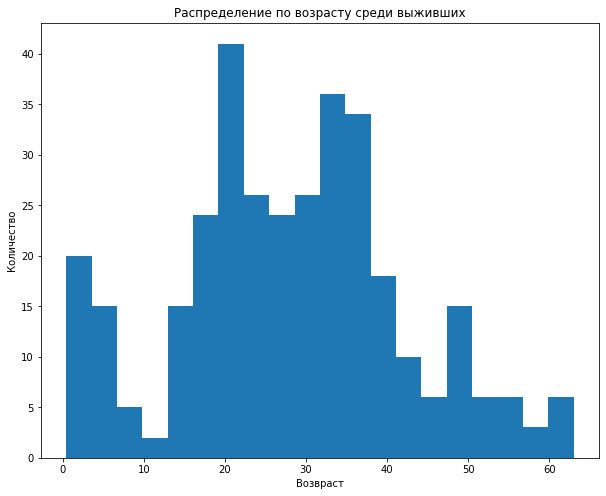

In [28]:
plt.figure(figsize=(10,8))
data[data['Survived'] == 1]['Age'].plot(kind='hist',title='Распределение по возрасту среди выживших', bins=20)
plt.xlabel('Возвраст')
plt.ylabel('Количество')
plt.show

При построение данного графика используются искусственные данные, которыми мы заменили отсутствующие значения. Поэтому они не соответствуют реально картине.

### Обучим ту же модель, что в п. 2 на преобразованных данных. Посчитаем ту же, что в п. 2 метрику

In [29]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,...,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
X = data[data.columns[1:]]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

model = LogisticRegression(solver = 'newton-cg')
model.fit(X_train, y_train)

predictions2 = model.predict_proba(X_test)
roc_auc_score(y_test, predictions2[:, 1])

0.8610969387755102

In [31]:
model.score(X_train, y_train)

0.844851904090268

In [32]:
model.score(X_test, y_test)

0.7808988764044944

### Математически преобразуем признак Age и обучим модель на нём

In [33]:
def get_age_cat(age):
    if age < 13:
        return 'child'
    elif age <= 18:
        return 'teenager'
    elif age <= 24:
        return 'young adult'
    elif age < 40:
        return 'adult'
    elif age < 50:
        return 'middle-aged'
    elif age < 65:
        return 'senior citizen'
    else:
        return 'old'

In [34]:
data['Age_category'] = data['Age'].apply(lambda x: get_age_cat(x))

In [35]:
age = onehotencoder.fit_transform(data[['Age_category']]).toarray()
age = pd.DataFrame(age, columns=onehotencoder.categories_[0])
data = pd.concat([data, age], axis=1)
data = data.drop(columns = ['Age', 'Age_category'])

In [36]:
data = data.dropna(axis=0)

In [37]:
X = data[data.columns[1:]]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

model = LogisticRegression(solver = 'newton-cg')
model.fit(X_train, y_train)

predictions2 = model.predict_proba(X_test)
roc_auc_score(y_test, predictions2[:, 1])

0.8698412698412699

In [38]:
model.score(X_train, y_train)

0.8371104815864022

In [39]:
model.score(X_test, y_test)

0.8022598870056498

### Выводы: 

При работе с данными мною были исключены несущественные признаки, были устранены пропуски в записях, а также были преобразованы категориальные значения с помощью метода OneHotEncoding

Вышеописанные изменения позволили увеличить показатель roc_auc_score c 0.82 до 0.86, также улучшили качество работы модели с 0.7 до 0.78. Математическое преобразование признака Age позволило roc_auc_score до 0.87 и качество работы до 0.8